# Uniform and normal distributions

This notebook supports material covered in the class for uniform and normal distribution. Uniform and Normal distributions are described here, along with how to use the distributions within `scipy.stats` module and compute pdf, cdf, etc. Following topics are covered here:

There are various code blocks in between the text which provide python implementation for described task. You can run the code block and see the results. You can also change the value of various parameters and see how it changes the result.

Please go through the notebook entirely and reach out to the teaching team if you have any doubts.

You need to install **seaborn**. Activate the environment you created for this class in the anaconda prompt and install seaborn using `pip install seaborn`.

<font color='red'>**Please run the below block of code before you run any other block**</font> - it imports all the packages needed for this notebook.

In [2]:
from scipy.stats import norm # Imports normal distribution
from scipy.stats import uniform # Imports uniform distribution
from scipy.stats import multivariate_normal # Imports multivariate normal distribution
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Uniform Distribution

A continuous random variable $X$ is said to have a uniform distribution on the interval $[A, B]$ if the pdf of $X$ is:

$$
    f(x;A,B) = 
    \begin{cases}
        \frac{1}{B-A} & A \leq X \leq B \\
         0 & \text{otherwise}
    \end{cases}
$$

This distribution essentially denotes that any value is equally likely between $A$ and $B$. The statement that $X$ has a uniform distribution on $[A, B]$ will be denoted by $X \sim$ Unif $[A, B]$. Now, we will look at an example for this distribution.

**Example**: Suppose the reaction temperature $X$ (in $^{\circ}$C) in a chemical process has a uniform distribution with
$A = -10$ and $B = 20$. Thus, pdf of $X$ will be:

$$
    f(x;A,B) = 
    \begin{cases}
        \frac{1}{30} & -10 \leq X \leq 20 \\
         0 & \text{otherwise}
    \end{cases}
$$

Now, let's use ``uniform`` object within `scipy.stats` module to answer various questions related to this example. By default, `uniform` object will in standard form i.e. $A = 0$ and $B = 1$. So, we need to mention `loc` (which is A) and `scale` (which is B - A). Reading the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform) for uniform distribution implemented in scipy will help.

**Question**: Compute mean, variance and standard deviation of this distribution.

**Answer**: Once `uniform` object is imported (which you did when you ran the first block in this notebook), you can access various function related to the distribution. To compute the quantities, function within `uniform` object is used as shown in following block.

In [3]:
# Defining starting point and range of uniform distribution
# loc = A
# scale = B - A
A = -10
B = 20
loc = A
scale = B - A

# Creating uniform distribution object with fixed location and scale parameters
rv = uniform(loc=loc, scale=scale)

# Compute mean of the distribution
print("Mean for this distribution: {}".format(rv.mean()))

# Compute variance of the distribution
print("Variance for this distribution: {}".format(rv.var()))

# Compute std-dev of the distribution
print("Standard deviation for this distribution: {}".format(rv.std()))

Mean for this distribution: 5.0
Variance for this distribution: 75.0
Standard deviation for this distribution: 8.660254037844387


**Question**: Compute $P(X < 10).

**Answer**: Here, $P(X < 10) = P(X \leq 10) = F(10)$. So, we have to compute cdf for uniform distribution at $10$. You can do this as shown in following block:

In [4]:
# P(X<0)
rv.cdf(10)

0.6666666666666666

**Question**: Compute $P(-5 < X < 5)$:

**Answer**: Here, $P(-5 < X < 5) = P(-5 \leq X \leq 5) = F(5) - F(-5)$. So, we have to compute cdf for uniform distribution at $5$ and $-5$. You can do this calculating as shown in following block:

In [6]:
# P(-10 < X < 25)
rv.cdf(5) - rv.cdf(-5)

0.33333333333333337

**Question**: Plot cdf and pdf of the distribution.

**Answer**: We can use the `rv` object created in previous block and compute value of pdf and cdf at a bunch of x values. Then, use `matplotlib` to plot them. Code in the following block executes this task.

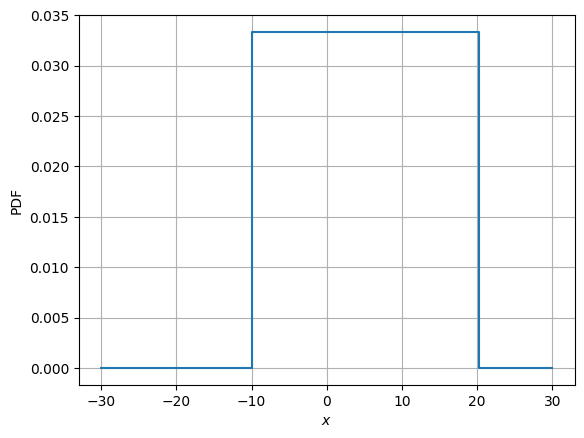

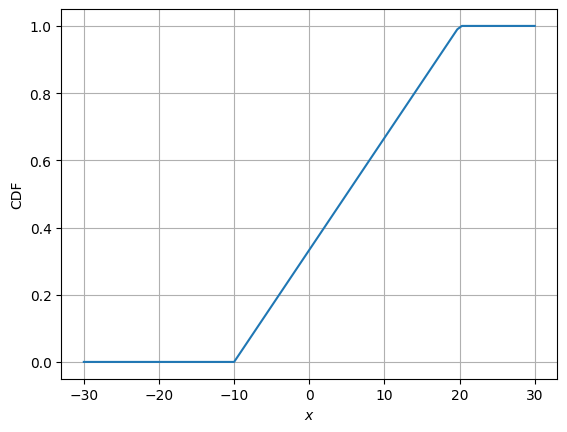

In [7]:
# Creating array of x values at which pdf and cdf will be computed while plotting
x = np.linspace(-30, 30, 100)

# Plotting PDF
fig, ax = plt.subplots()
ax.step(x, rv.pdf(x), where='post')
ax.set_xlabel("$x$")
ax.set_ylabel("PDF")
ax.grid()
plt.show()

# Plotting CDF
fig, ax = plt.subplots()
ax.plot(x, rv.cdf(x))
ax.set_xlabel("$x$")
ax.set_ylabel("CDF")
ax.grid()
plt.show()

Now, we will look into *frequency interpretation* of probability. You can read more about it [here](https://online.stat.psu.edu/stat500/lesson/2/2.3). Below code plots the distribution of samples drawn from uniform distribution. Number of samples initially is set to 10 and with every iteration it increases by an order of magnitude. Run the below code block and see the plots.

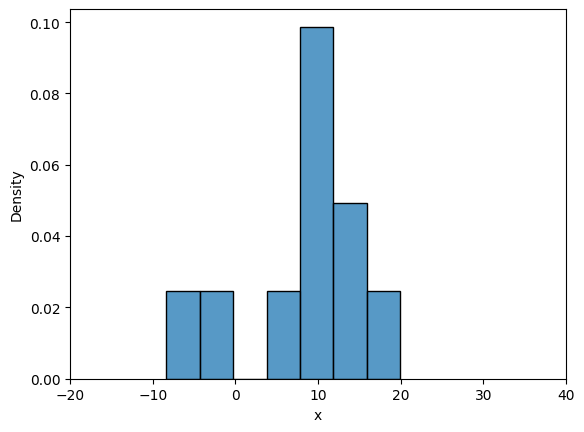

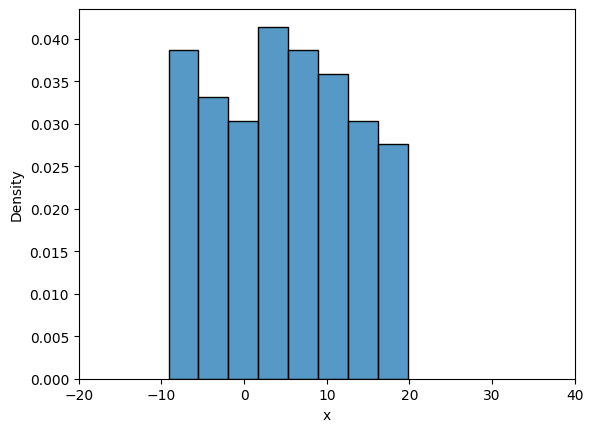

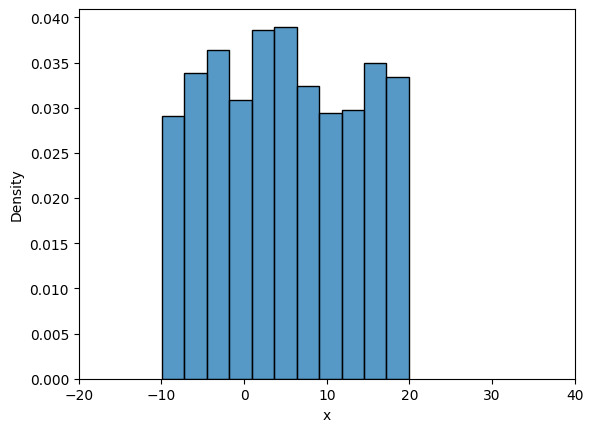

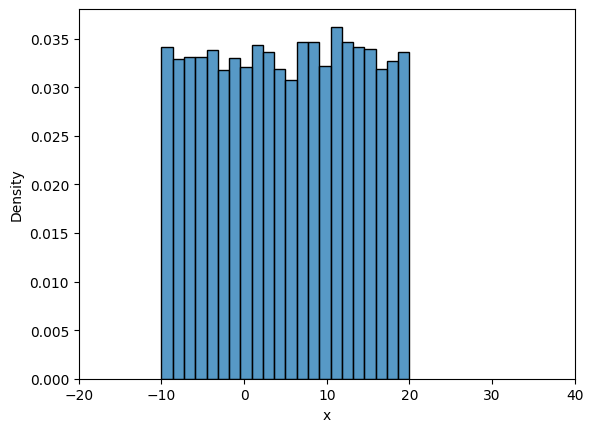

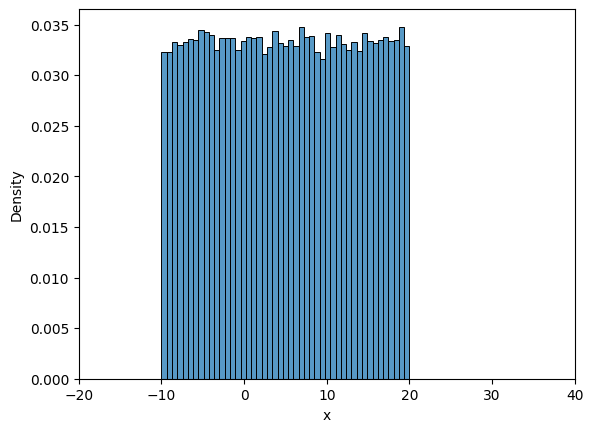

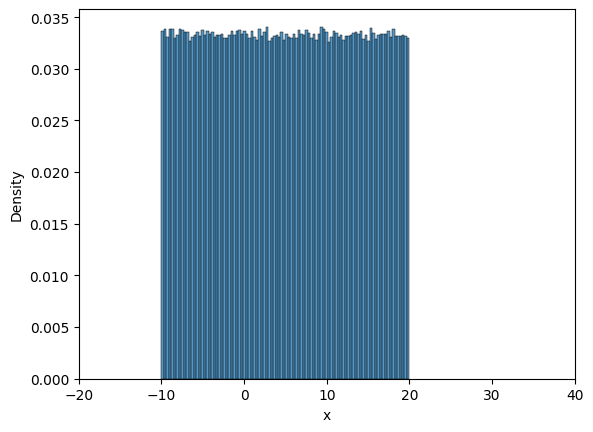

In [8]:
# Some settings
initial_samples = 10
iter = 6

for i in range(iter):
    # Number of samples
    samples = initial_samples*10**(i)

    # Generate samples from the distribution
    data = rv.rvs(size=samples)

    # Plotting using seaborn
    fig, ax = plt.subplots()
    plot = sns.histplot(data, stat="density", ax=ax)
    ax.set_xlabel("x")
    ax.set_xlim([-20, 40])

Note that all the samples are between $A$ and $B$, and as the number of samples increase the density value approaches $1/30$ which is the theortical density value. You can play around with the value of `iter`, `initial_samples`, $A$, $B$ and see how distribution changes.

## Normal Distribution

A continuous random variable $X$ is said to have a normal distribution (or Gaussian distribution) with parameters $\mu$ and $\sigma$, where $-\infty \leq \mu \leq \infty$ and $\sigma > 0$, if the pdf of $X$ is 

$$
    f(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \text{, where } -\infty \leq x \leq \infty
$$

The statement that $X$ is normally distributed with parameters $\mu$ and $\sigma$ is often abbreviated as $X \sim \mathcal{N}(\mu,\sigma)$. We will perform an exercise as we did with uniform distribution.

**Example**: Suppose the force acting on a column that helps to support a building is a normally distributed random variable $X$ with mean value 9 N and standard deviation 1.5 N.

Now, let's use `norm` object within `scipy.stats` module to answer various questions related to this example. Reading the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) for normal distribution implemented in scipy will help.

**Question**: Compute mean, variance, and standard deviation.

**Answer**: This is very straight-forward since it is gaussian distribution, but just to demostrate, we will use `norm` object.